# Importar Bibliotecas

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# Carga de Datos

In [2]:
df = pd.read_csv('train.csv')
df.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3


# EDA

In [3]:
df.shape

(14993, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [71]:
df.isna().sum()

Type              0
Name              0
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
RescuerID         0
VideoAmt          0
Description      13
PetID             0
PhotoAmt          0
AdoptionSpeed     0
dtype: int64

# Limpiar
* Reemplazar nulos por 'Unnamed'
* Crear columna con has_Name, booleana, si tiene nombre o es unnamed (y description es vacío)
* Verificar caracteres especiales, nombres raros, números, etc

In [14]:
df['Name'].value_counts(dropna=False)

Name
NaN                       1265
Baby                        66
Lucky                       64
No Name                     54
Brownie                     54
                          ... 
Maroo                        1
4 PUPPIES FOR ADOPTION       1
Trish                        1
Lab Mix Puppy 2              1
Fili                         1
Name: count, Length: 9060, dtype: int64

In [18]:
df['Name'] = df['Name'].str.capitalize()
df['Name'].value_counts(dropna=False)

Name
NaN                       1265
Baby                        67
Lucky                       66
Mimi                        59
Brownie                     55
                          ... 
Fallen angel                 1
Fuzzy                        1
Maroo                        1
4 puppies for adoption       1
Fili                         1
Name: count, Length: 8846, dtype: int64

In [20]:
df['Name'] = df['Name'].fillna('Unnamed')
df['Name'].value_counts(dropna=False)

Name
Unnamed                   1271
Baby                        67
Lucky                       66
Mimi                        59
Brownie                     55
                          ... 
Fallen angel                 1
Fuzzy                        1
Maroo                        1
4 puppies for adoption       1
Fili                         1
Name: count, Length: 8845, dtype: int64

In [23]:
df['Name'] = df['Name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [21]:
df['Name'].str.replace('No Name Yet', 'Unnamed')

0                Nibble
1           No name yet
2                Brisco
3                  Miko
4                Hunter
              ...      
14988           Unnamed
14989    Serato & eddie
14990           Monkies
14991           Ms daym
14992              Fili
Name: Name, Length: 14993, dtype: object

In [12]:
df['Name'].unique()

array(['Nibble', 'No Name Yet', 'Brisco', ..., 'Monkies', 'Ms Daym',
       'Fili'], dtype=object)

In [13]:
df['Name'].values

array(['Nibble', 'No Name Yet', 'Brisco', ..., 'Monkies', 'Ms Daym',
       'Fili'], dtype=object)

# Columna 'Age', armar categorías (bins), armar otra columna de 'Age_Year'

In [9]:
np.sort(df['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  72,  73,  74,  75,  76,  77,  78,  80,  81,  82,
        84,  85,  86,  87,  88,  89,  91,  92,  95,  96, 100, 102, 108,
       112, 117, 120, 122, 123, 132, 135, 144, 147, 156, 168, 180, 212,
       238, 255])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           14993 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [26]:
df['Breed1'].dtype

dtype('int64')

In [25]:
df['Breed1'].describe()

count    14993.000000
mean       265.272594
std         60.056818
min          0.000000
25%        265.000000
50%        266.000000
75%        307.000000
max        307.000000
Name: Breed1, dtype: float64

In [29]:
df['Breed2'].describe()

count    14993.000000
mean        74.009738
std        123.011575
min          0.000000
25%          0.000000
50%          0.000000
75%        179.000000
max        307.000000
Name: Breed2, dtype: float64

In [31]:
df['Gender'].value_counts(dropna=False)

Gender
2    7277
1    5536
3    2180
Name: count, dtype: int64

In [34]:
df['Color1'].value_counts(dropna=False)

Color1
1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: count, dtype: int64

In [35]:
df['Color2'].value_counts(dropna=False)

Color2
0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: count, dtype: int64

In [36]:
df['Color3'].value_counts(dropna=False)

Color3
0    10604
7     3221
5      417
6      378
4      198
3      175
Name: count, dtype: int64

# MaturitySize

**Tamaño de perro en adultez.**
Agregar descripción

In [37]:
df['MaturitySize'].value_counts(dropna=False)

MaturitySize
2    10305
1     3395
3     1260
4       33
Name: count, dtype: int64

In [62]:
df['Fee'].value_counts(dropna=False)

Fee
0      12663
50       468
100      408
200      219
150      162
       ...  
170        1
135        1
14         1
89         1
190        1
Name: count, Length: 74, dtype: int64

* Cruzar con razas, ver si las razas no callejeras son caras
* Ver el 0
* Armar columna booleana, gratis vs pago

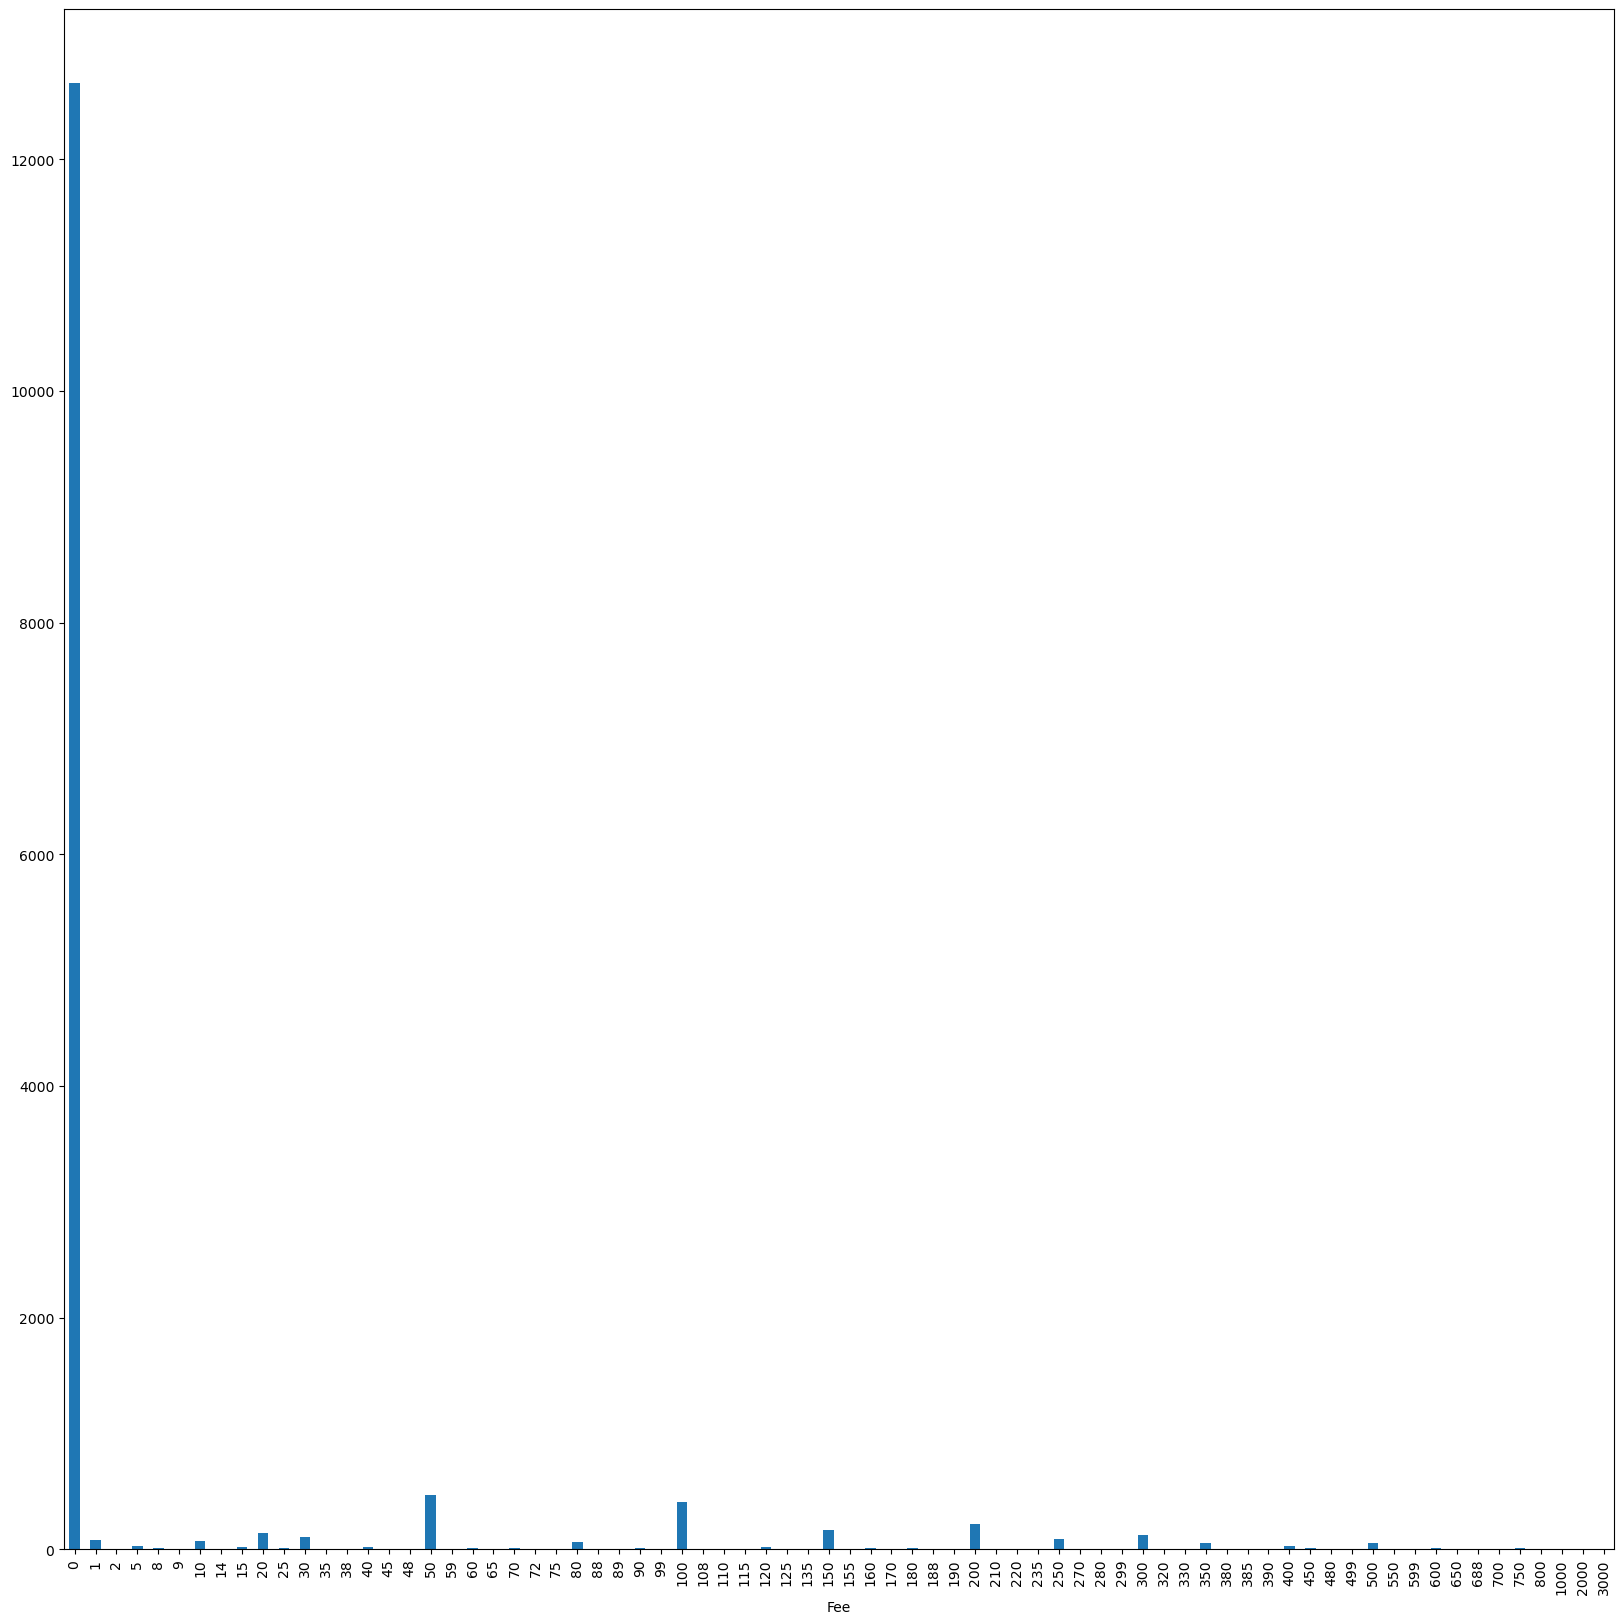

In [61]:
plt.figure(figsize=(20,20))
df['Fee'].value_counts(dropna=False).sort_index().plot(kind='bar');

# FurLength

In [64]:
df['FurLength'].value_counts(dropna=False)

FurLength
1    8808
2    5361
3     824
Name: count, dtype: int64

# Vaccinated

In [63]:
df['Vaccinated'].value_counts(dropna=False)

Vaccinated
2    7227
1    5898
3    1868
Name: count, dtype: int64

# Dewormed

In [66]:
df['Dewormed'].value_counts(dropna=False)

Dewormed
1    8397
2    4815
3    1781
Name: count, dtype: int64

# Sterilized

In [67]:
df['Sterilized'].value_counts(dropna=False)

Sterilized
2    10077
1     3101
3     1815
Name: count, dtype: int64

# Health

In [69]:
df['Health'].value_counts(dropna=False)

Health
1    14478
2      481
3       34
Name: count, dtype: int64

# Quantity

In [72]:
df['Quantity'].value_counts(dropna=False)

Quantity
1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
14        2
13        2
18        1
Name: count, dtype: int64

# State

In [73]:
df['State'].value_counts(dropna=False)

State
41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: count, dtype: int64

In [70]:
df['PhotoAmt']

0        1.0
1        2.0
2        7.0
3        8.0
4        3.0
        ... 
14988    3.0
14989    3.0
14990    5.0
14991    3.0
14992    1.0
Name: PhotoAmt, Length: 14993, dtype: float64

* PhotoAmt, ver cantidad de fotos, relación con AdotionSpeed

In [65]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [38]:
for col in df.columns:
    print(f'Columna: {col}')
    print(df[col].value_counts(dropna=False))
    print('-' * 40)

Columna: Type
Type
1    8132
2    6861
Name: count, dtype: int64
----------------------------------------
Columna: Name
Name
Unnamed                           1272
Baby                                67
Lucky                               66
Mimi                                60
Brownie                             56
                                  ... 
Brother  sister                      1
Batty                                1
Mixed breed puppies in serdang       1
Fury                                 1
Fili                                 1
Name: count, Length: 8744, dtype: int64
----------------------------------------
Columna: Age
Age
2      3503
1      2304
3      1966
4      1109
12      967
       ... 
69        1
74        1
81        1
44        1
100       1
Name: count, Length: 106, dtype: int64
----------------------------------------
Columna: Breed1
Breed1
307    5927
266    3634
265    1258
299     342
264     296
       ... 
176       1
214       1
125       1
123  

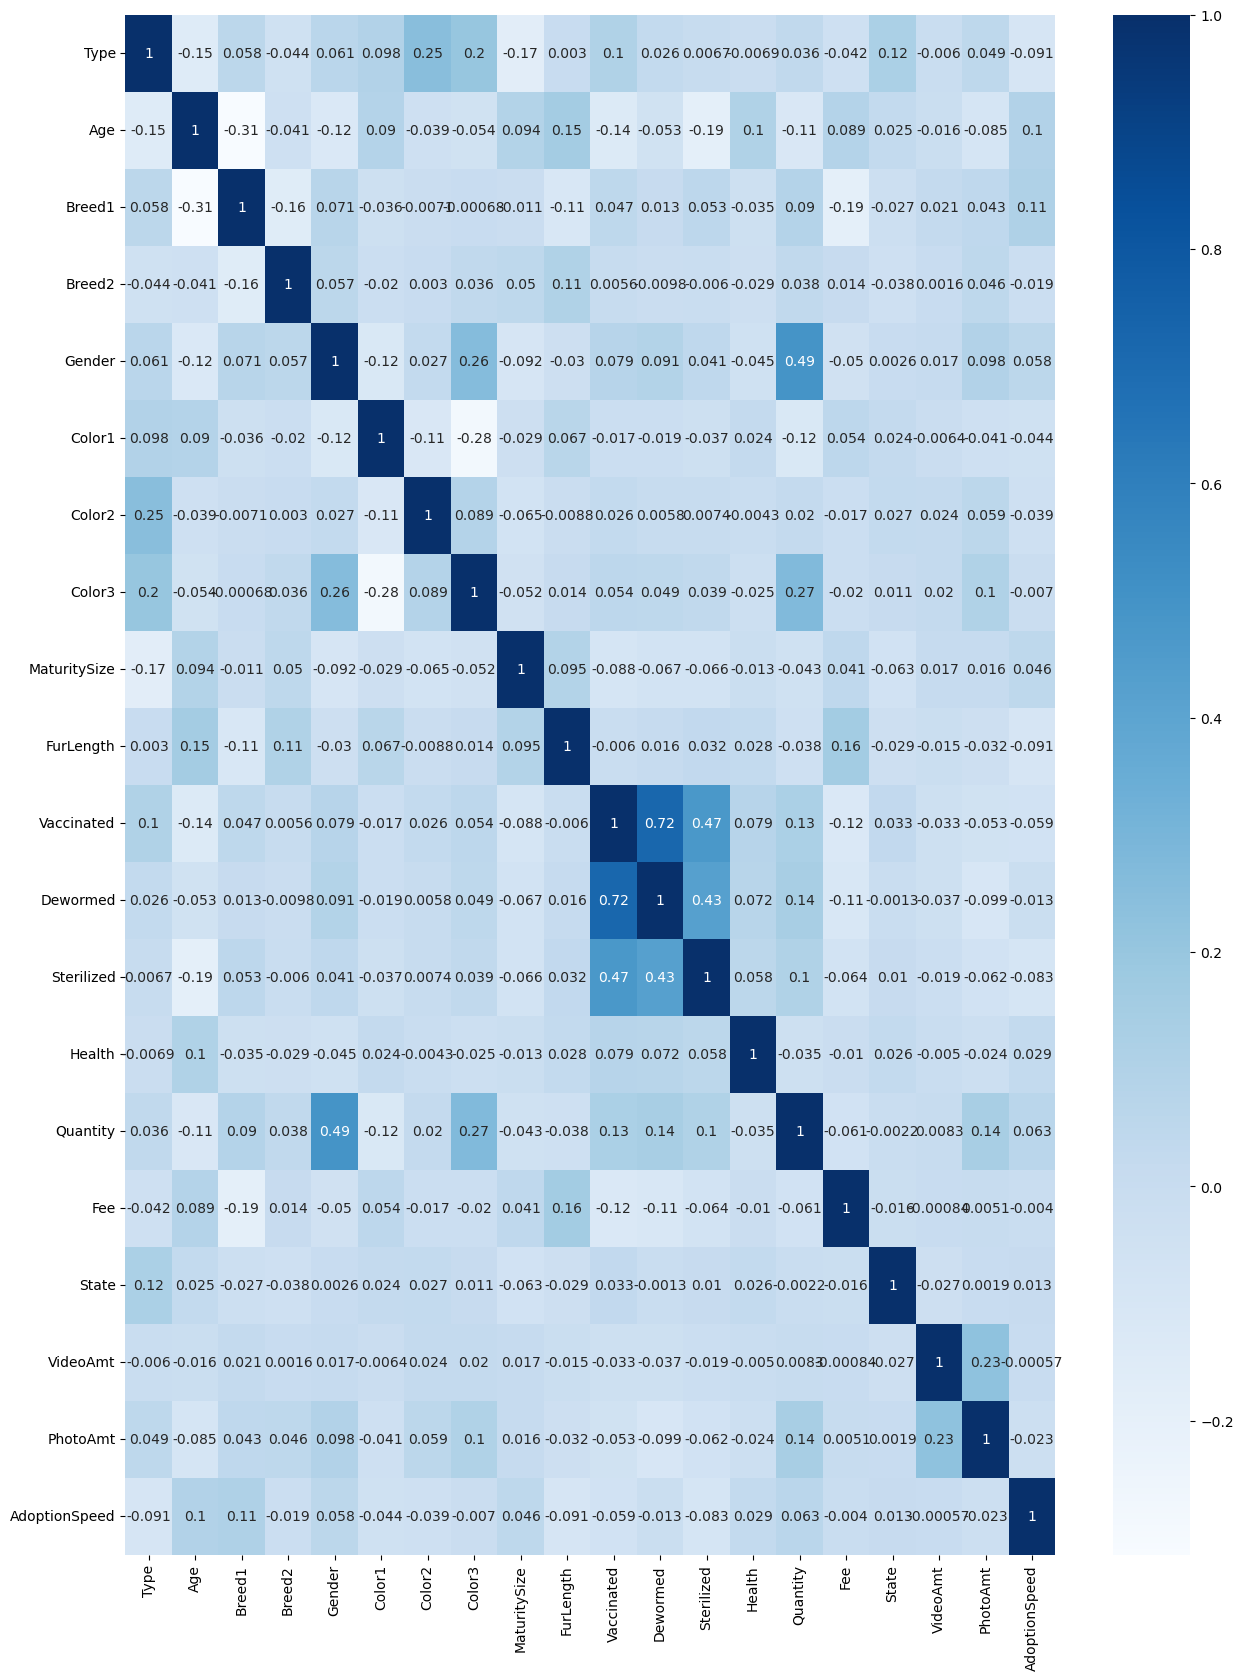

In [53]:
plt.figure(figsize=(15,20))

df_corr = df.select_dtypes(['int64', 'float64']).corr()
sns.heatmap(df_corr, annot=True, cmap='Blues');

* Análisis multivariado
* Graficar variables correlacionadas
* 

# Modelos

# Backlog

* Agregar comentarios en cada celda
* Análisis Multivariado